In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from xgboost import XGBClassifier, XGBRegressor
import xgboost as xgb
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
    AdaBoostClassifier,
    AdaBoostRegressor
)
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    root_mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    classification_report
)

# Classification Model Comparison

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
df = data.frame

In [4]:
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

In [5]:
x_cif = df.drop("target", axis=1)
y_cif = df["target"]

In [6]:
x_cif_train, x_cif_test, y_cif_train, y_cif_test = train_test_split(x_cif, y_cif, test_size=0.2, random_state=42)

In [7]:
models = {
    "Logistic Regression" : LogisticRegression,
    "Decision Tree Classifier" : DecisionTreeClassifier,
    "Random Forest Classifier" : RandomForestClassifier,
    "XGBoost Classifier" : XGBClassifier,
    "ADABoost" : AdaBoostClassifier,
    "GradiantBoost" : GradientBoostingClassifier
}

Logistic Regression :- 
	Train Score:- 94.95%
	Test Score :- 94.74%
	Accuracy Score :- 94.74%
	Precision Score :- 93.33%
	Recall Score = 98.59%
	F1 Score = 95.89%
	Confusion Matrix:- [[38  5]
 [ 1 70]]
Classification Report on Logistic Regression :- 
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


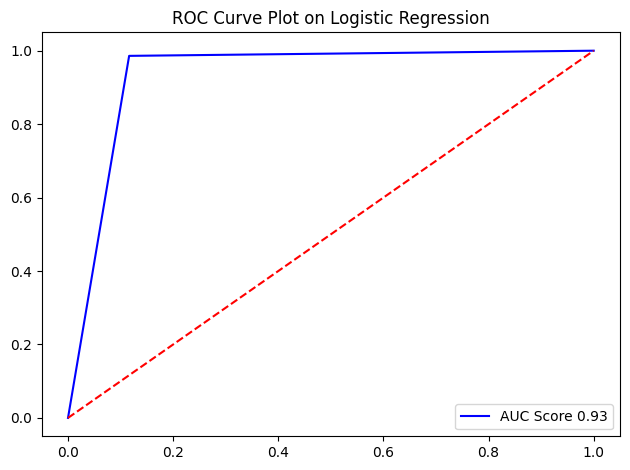

----------------------------------------------------------------------------------------------------
Decision Tree Classifier :- 
	Train Score:- 100.00%
	Test Score :- 92.11%
	Accuracy Score :- 92.11%
	Precision Score :- 94.29%
	Recall Score = 92.96%
	F1 Score = 93.62%
	Confusion Matrix:- [[39  4]
 [ 5 66]]
Classification Report on Decision Tree Classifier :- 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.94      0.93      0.94        71

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



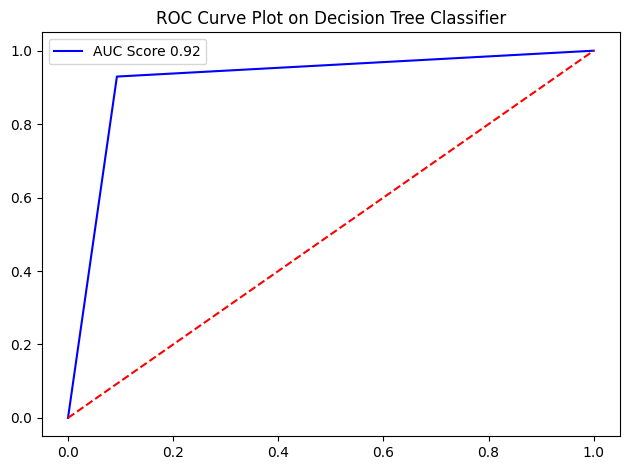

----------------------------------------------------------------------------------------------------
Random Forest Classifier :- 
	Train Score:- 100.00%
	Test Score :- 96.49%
	Accuracy Score :- 96.49%
	Precision Score :- 95.89%
	Recall Score = 98.59%
	F1 Score = 97.22%
	Confusion Matrix:- [[40  3]
 [ 1 70]]
Classification Report on Random Forest Classifier :- 
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



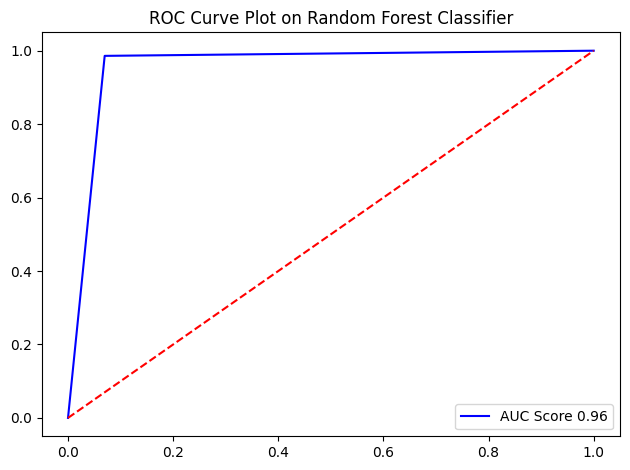

----------------------------------------------------------------------------------------------------
XGBoost Classifier :- 
	Train Score:- 100.00%
	Test Score :- 95.61%
	Accuracy Score :- 95.61%
	Precision Score :- 95.83%
	Recall Score = 97.18%
	F1 Score = 96.50%
	Confusion Matrix:- [[40  3]
 [ 2 69]]
Classification Report on XGBoost Classifier :- 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



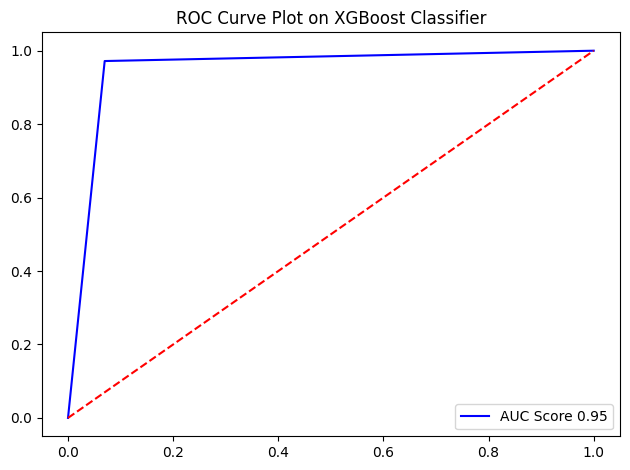

----------------------------------------------------------------------------------------------------
ADABoost :- 
	Train Score:- 100.00%
	Test Score :- 96.49%
	Accuracy Score :- 96.49%
	Precision Score :- 95.89%
	Recall Score = 98.59%
	F1 Score = 97.22%
	Confusion Matrix:- [[40  3]
 [ 1 70]]
Classification Report on ADABoost :- 
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



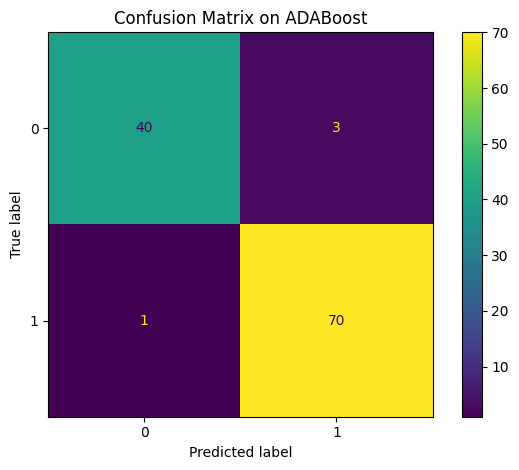

----------------------------------------------------------------------------------------------------
GradiantBoost :- 
	Train Score:- 100.00%
	Test Score :- 95.61%
	Accuracy Score :- 95.61%
	Precision Score :- 95.83%
	Recall Score = 97.18%
	F1 Score = 96.50%
	Confusion Matrix:- [[40  3]
 [ 2 69]]
Classification Report on GradiantBoost :- 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



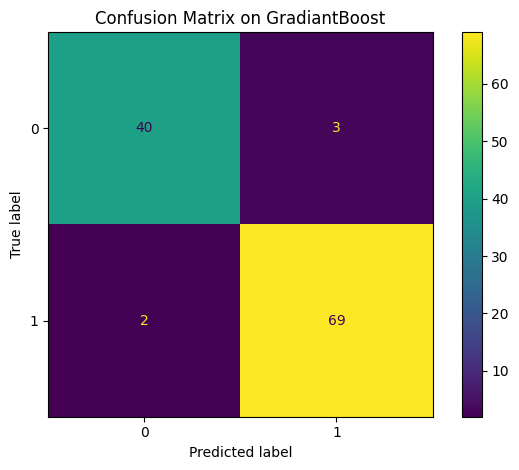

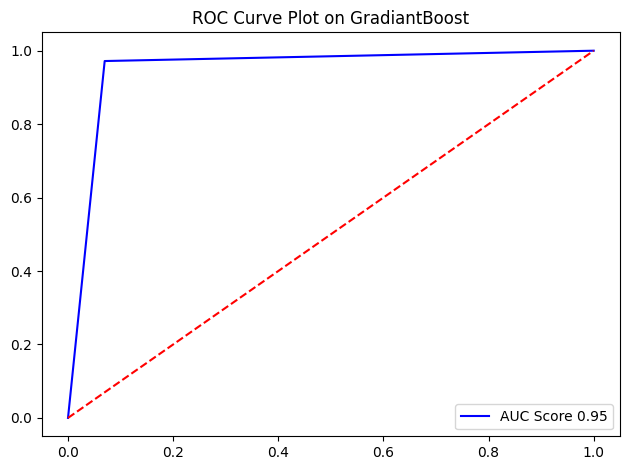

----------------------------------------------------------------------------------------------------


In [8]:
cif_result_list = []
cif_score_list = []

for name, model_class in models.items():
    model = model_class()
    model.fit(x_cif_train, y_cif_train)

    y_cif_pred = model.predict(x_cif_test)

    train_score = model.score(x_cif_train, y_cif_train)
    test_score = model.score(x_cif_test, y_cif_test)
    accuracy = accuracy_score(y_cif_test, y_cif_pred)
    precision_score_val = precision_score(y_cif_test, y_cif_pred)
    recall_score_val = recall_score(y_cif_test, y_cif_pred)
    f1_score_val = f1_score(y_cif_test, y_cif_pred)
    cm = confusion_matrix(y_cif_test, y_cif_pred)

    print(f"{name} :- ")
    print(f"\tTrain Score:- {train_score*100:.2f}%")
    print(f"\tTest Score :- {test_score*100:.2f}%")
    print(f"\tAccuracy Score :- {accuracy*100:.2f}%")
    print(f"\tPrecision Score :- {precision_score_val*100:.2f}%")
    print(f"\tRecall Score = {recall_score_val*100:.2f}%")
    print(f"\tF1 Score = {f1_score_val*100:.2f}%")
    print(f"\tConfusion Matrix:- {cm}")

    print(f"Classification Report on {name} :- \n{classification_report(y_cif_test, y_cif_pred)}")


    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f"Confusion Matrix on {name}")
    plt.tight_layout()
    plt.show()

    fpr, tpr, threshold = roc_curve(y_cif_test, y_cif_pred)
    auc_score = roc_auc_score(y_cif_test, y_cif_pred)
    plt.plot(fpr,tpr,label=f"AUC Score {auc_score:.2f}",color='blue')
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    plt.title(f"ROC Curve Plot on {name}")
    plt.tight_layout()
    plt.legend()
    plt.show()

    print("-" * 100)

    cif_result_list.append({
        "Model": name,
        "Train_Score": train_score,
        "Test_Score": test_score,
        "Accuracy": accuracy,
        "Precision": precision_score_val,
        "Recall": recall_score_val,
        "F1_Score": f1_score_val,
        "Confusion_Matrix": cm,
        "AUC_Score" : auc_score
    })

    cif_score_list.append({
        "Model": name,
        "Train_Score": train_score,
        "Test_Score": test_score
    })

df_cif_result = pd.DataFrame(cif_result_list)
df_cif_score = pd.DataFrame(cif_score_list)

In [9]:
df_cif_result

Model  Train_Score  Test_Score  Accuracy  Precision  \
0       Logistic Regression     0.949451    0.947368  0.947368   0.933333   
1  Decision Tree Classifier     1.000000    0.921053  0.921053   0.942857   
2  Random Forest Classifier     1.000000    0.964912  0.964912   0.958904   
3        XGBoost Classifier     1.000000    0.956140  0.956140   0.958333   
4                  ADABoost     1.000000    0.964912  0.964912   0.958904   
5             GradiantBoost     1.000000    0.956140  0.956140   0.958333   

     Recall  F1_Score    Confusion_Matrix  AUC_Score  
0  0.985915  0.958904  [[38, 5], [1, 70]]   0.934818  
1  0.929577  0.936170  [[39, 4], [5, 66]]   0.918277  
2  0.985915  0.972222  [[40, 3], [1, 70]]   0.958074  
3  0.971831  0.965035  [[40, 3], [2, 69]]   0.951032  
4  0.985915  0.972222  [[40, 3], [1, 70]]   0.958074  
5  0.971831  0.965035  [[40, 3], [2, 69]]   0.951032

In [10]:
df_cif_score

Model  Train_Score  Test_Score
0       Logistic Regression     0.949451    0.947368
1  Decision Tree Classifier     1.000000    0.921053
2  Random Forest Classifier     1.000000    0.964912
3        XGBoost Classifier     1.000000    0.956140
4                  ADABoost     1.000000    0.964912
5             GradiantBoost     1.000000    0.956140

Dicision Tree Distribution  Decision Tree Classifier


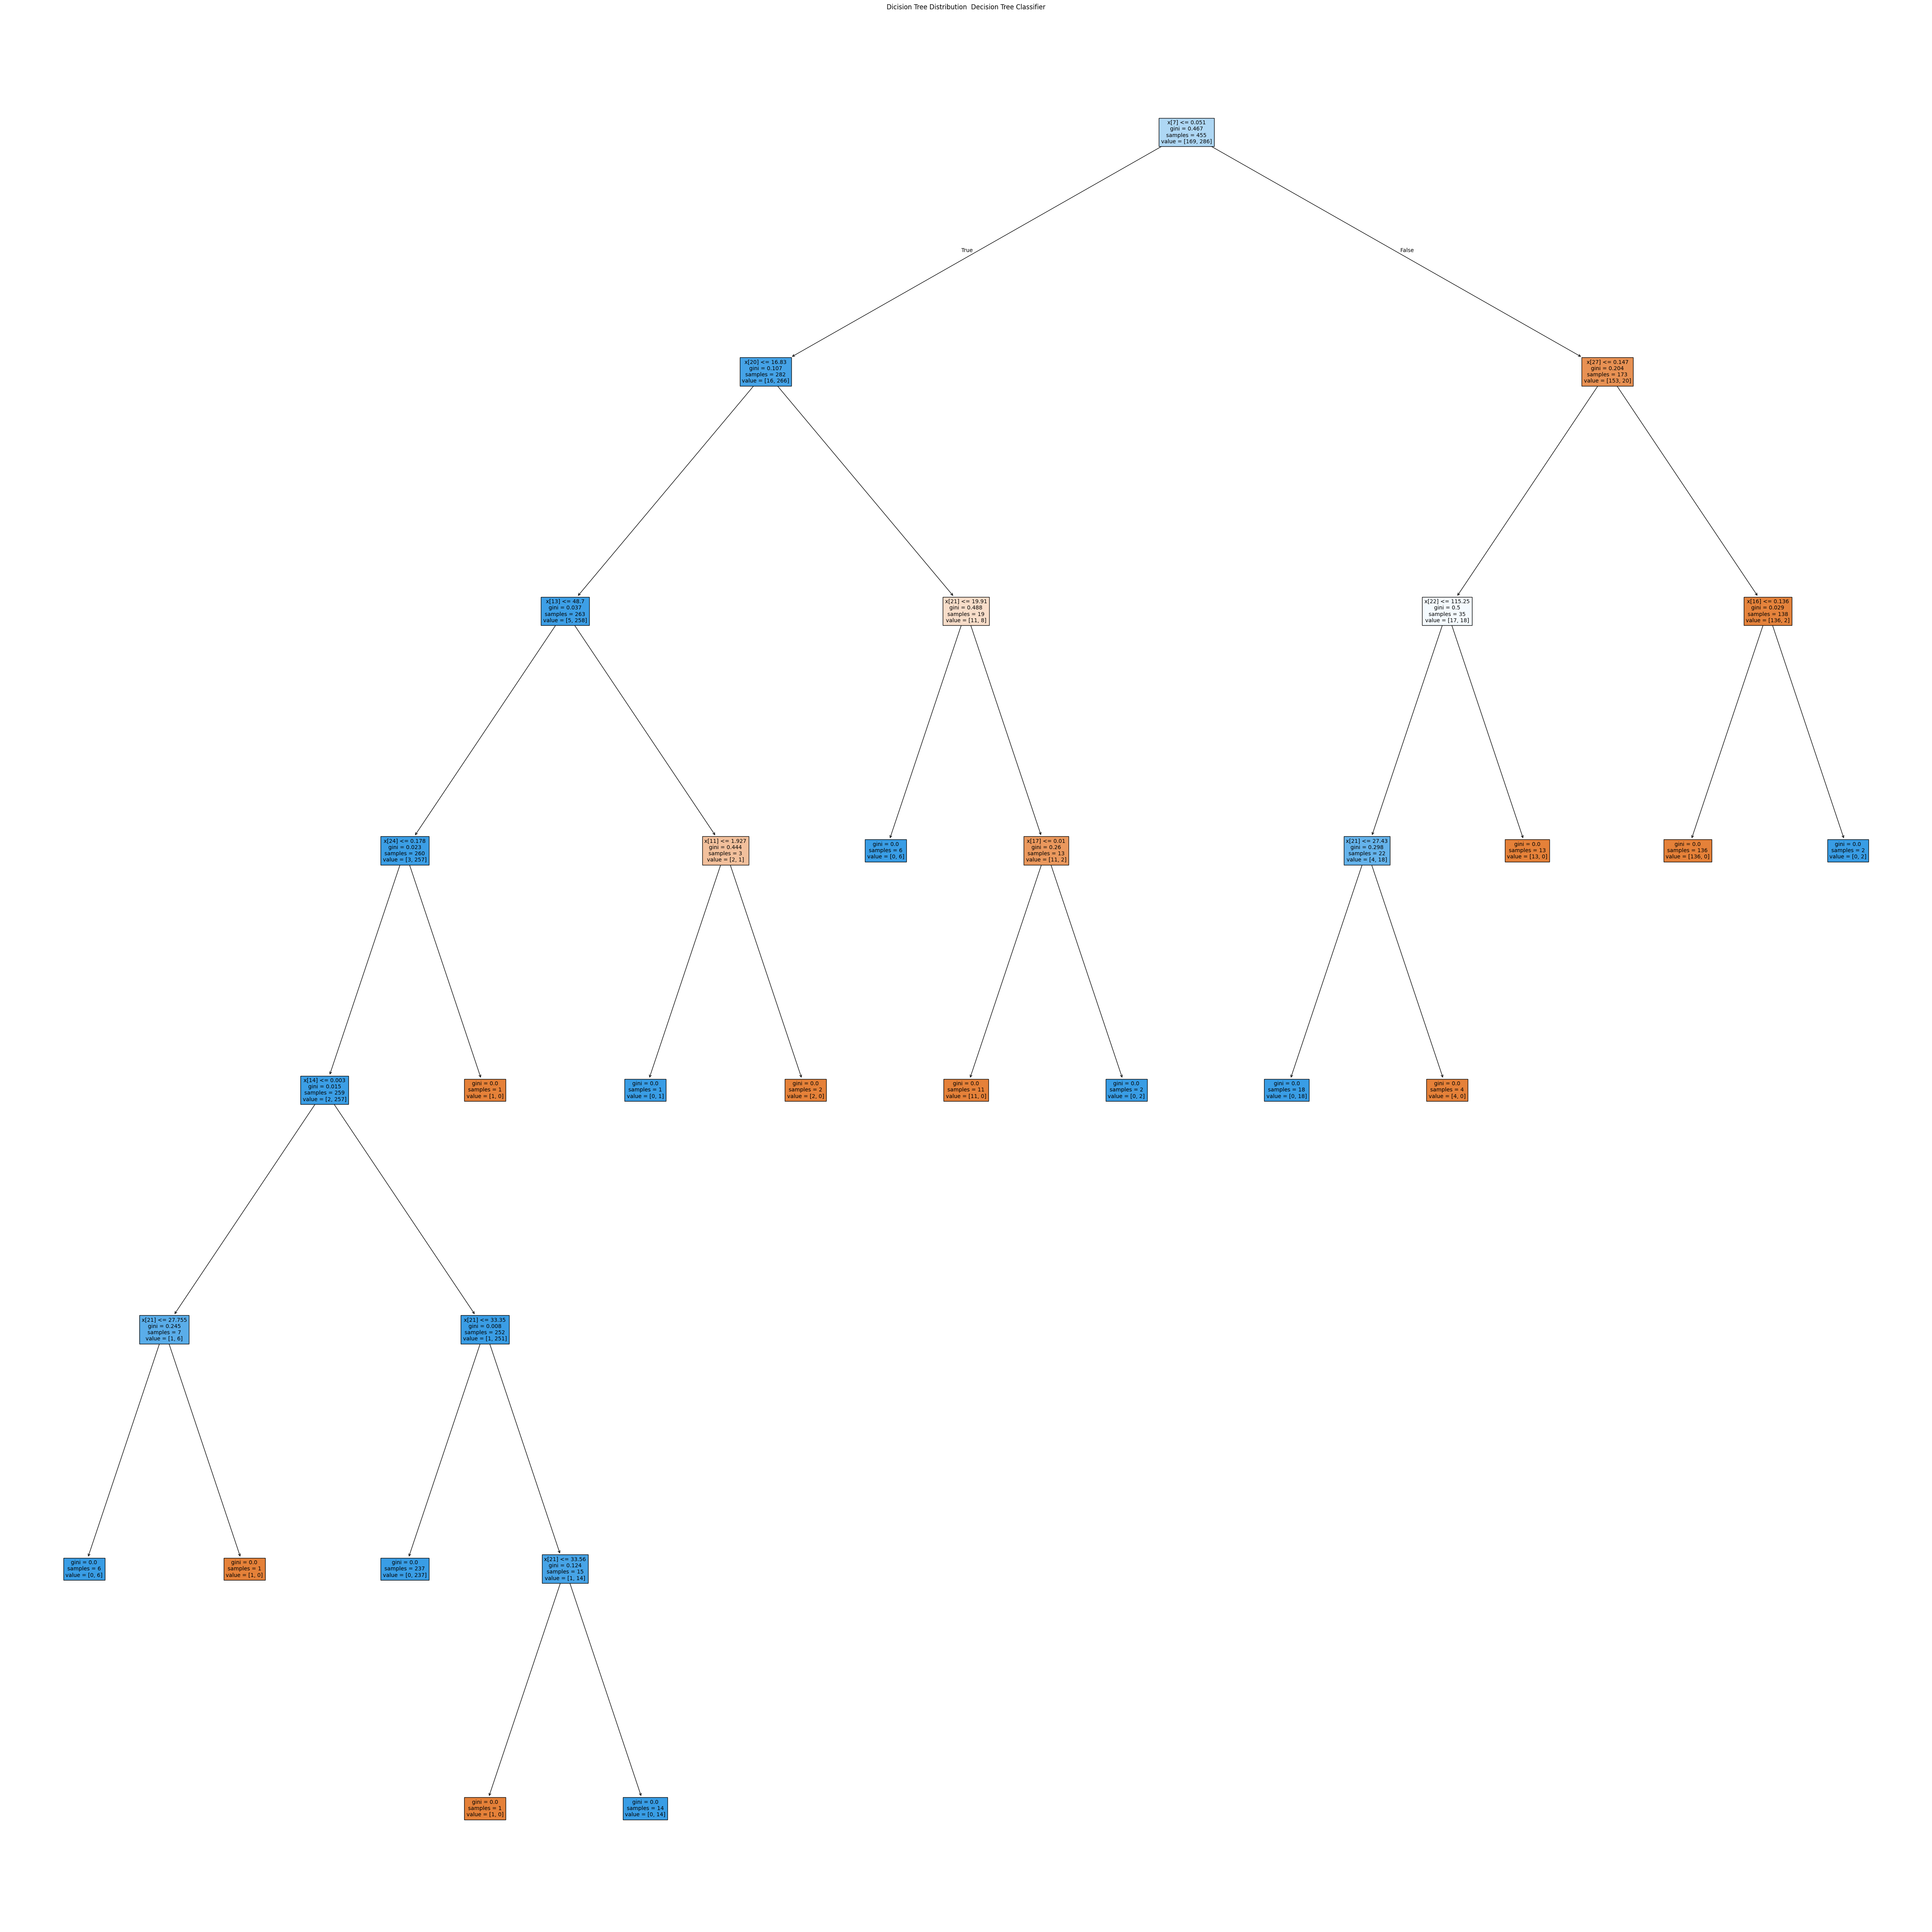

In [11]:
model = DecisionTreeClassifier()
model.fit(x_cif_train, y_cif_train)

print("Dicision Tree Distribution  Decision Tree Classifier")
plt.rcParams['figure.figsize'] = (50,50)
plot_tree(model, filled=True, fontsize=10)
plt.title(f"Dicision Tree Distribution  Decision Tree Classifier")
plt.tight_layout()
plt.show()

# Regression Model Comparison

In [12]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
df = data.frame

In [13]:
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

In [14]:
x_reg = df.drop("target", axis=1)
y_reg = df["target"]

In [15]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

In [16]:
models = {
    "Linear Regression" : LinearRegression,
    "Decision Tree Regression" : DecisionTreeRegressor,
    "Random Forest Regression" : RandomForestRegressor,
    "XGBoost Regression" : XGBRegressor,
    "ADABoost" : AdaBoostRegressor,
    "GradiantBoost" : GradientBoostingRegressor
}

In [17]:
reg_result_list = []
reg_score_list = []

for name, model_class in models.items():
    model = model_class()
    model.fit(x_reg_train, y_reg_train)

    y_reg_pred = model.predict(x_reg_test)

    train_score = model.score(x_reg_train, y_reg_train)
    test_score = model.score(x_reg_test, y_reg_test)
    r2_score_val = r2_score(y_reg_test, y_reg_pred)
    mean_squared_error_val = mean_squared_error(y_reg_test, y_reg_pred)
    mean_absolute_error_val = mean_absolute_error(y_reg_test, y_reg_pred)
    root_mean_squared_error_val = root_mean_squared_error(y_reg_test, y_reg_pred)

    print(f"{name} :- ")
    print(f"\tR2 Score:- {r2_score_val*100:.2f}%")
    print(f"\tMean Squared Error:- {mean_squared_error_val:.2f}")
    print(f"\tMean Absolute Error:- {mean_absolute_error_val:.2f}")
    print(f"\tRoot Mean Squared Error:- {root_mean_squared_error_val:.2f}")
    print("-"*30)

    reg_result_list.append({
        "Model_Name": name,
        "R2_score": r2_score_val,
        "Mean Squared Error": mean_squared_error_val,
        "Mean Absolute Error": mean_absolute_error_val,
        "Root Mean Squared Error" : root_mean_squared_error_val
    })
    
    reg_score_list.append({
        "Model": name,
        "Train_Score": train_score,
        "Test_Score": test_score
    })

df_reg_result = pd.DataFrame(reg_result_list)
df_reg_score = pd.DataFrame(reg_score_list)

Linear Regression :- 
	R2 Score:- 45.26%
	Mean Squared Error:- 2900.19
	Mean Absolute Error:- 42.79
	Root Mean Squared Error:- 53.85
------------------------------
Decision Tree Regression :- 
	R2 Score:- -0.46%
	Mean Squared Error:- 5322.40
	Mean Absolute Error:- 56.00
	Root Mean Squared Error:- 72.95
------------------------------
Random Forest Regression :- 
	R2 Score:- 43.14%
	Mean Squared Error:- 3012.30
	Mean Absolute Error:- 44.01
	Root Mean Squared Error:- 54.88
------------------------------
XGBoost Regression :- 
	R2 Score:- 36.75%
	Mean Squared Error:- 3351.00
	Mean Absolute Error:- 46.39
	Root Mean Squared Error:- 57.89
------------------------------
ADABoost :- 
	R2 Score:- 44.86%
	Mean Squared Error:- 2921.17
	Mean Absolute Error:- 43.72
	Root Mean Squared Error:- 54.05
------------------------------
GradiantBoost :- 
	R2 Score:- 45.37%
	Mean Squared Error:- 2894.48
	Mean Absolute Error:- 44.57
	Root Mean Squared Error:- 53.80
------------------------------


In [18]:
df_reg_result

Model_Name  R2_score  Mean Squared Error  \
0         Linear Regression  0.452603         2900.193628   
1  Decision Tree Regression -0.004578         5322.404494   
2  Random Forest Regression  0.431444         3012.298247   
3        XGBoost Regression  0.367515         3351.001638   
4                  ADABoost  0.448644         2921.166323   
5             GradiantBoost  0.453681         2894.481906   

   Mean Absolute Error  Root Mean Squared Error  
0            42.794095                53.853446  
1            56.000000                72.954811  
2            44.011236                54.884408  
3            46.388966                57.887837  
4            43.718236                54.047815  
5            44.568543                53.800389

In [19]:
df_reg_score

Model  Train_Score  Test_Score
0         Linear Regression     0.527919    0.452603
1  Decision Tree Regression     1.000000   -0.004578
2  Random Forest Regression     0.924287    0.431444
3        XGBoost Regression     0.999996    0.367515
4                  ADABoost     0.625007    0.448644
5             GradiantBoost     0.835903    0.453681

In [20]:
model = DecisionTreeRegressor()
model.fit(x_reg_train, y_reg_train)

print("Dicision Tree Distribution  Decision Tree Regression")
plt.rcParams['figure.figsize'] = (50,50)
plot_tree(model, filled=True, fontsize=10)
plt.title(f"Dicision Tree Distribution  Decision Tree Regression")
plt.tight_layout()
plt.show()

Dicision Tree Distribution  Decision Tree Regression
